In [1]:
import ugradio
import ugradio.coord
import astropy.coordinates
import astropy.time
import time
import numpy as np
import matplotlib.pylab as plt
import inspect
import collections
from scipy.interpolate import interp1d
# import emcee

In [2]:
pwd = '/home/zoeko/astro121lab/lab3/data/sun/'
# pwd = '/home/pi/Blueberry Pi/astro121lab/lab3/data/sun/'

def freq_to_period(freq):
    '''take frequency (in kHz)
    and converts to period (in microseconds)'''
    return (1/freq) * 1000

freq = 500 * 1000 * 1000 # Hz

In [3]:
fname = f'{pwd}full_day_sun.npy'
data = np.load(fname, allow_pickle=True)

In [4]:
total_duration = (data[-1]['time']-data[0]['time'])/60
print(total_duration)

35.56108645995458


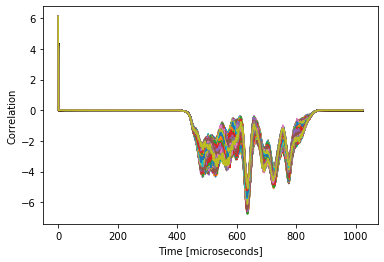

In [6]:
for i in range(len(data)):
    data_block = data[i]
    corr = data_block['corr01'].real
    data_time = data_block['time']
#     time = np.arange(len(corr)) * freq_to_period(freq/10**3) # in microseconds
    plt.plot(corr)
    plt.xlabel('Time [microseconds]')
    plt.ylabel('Correlation')
plt.show()

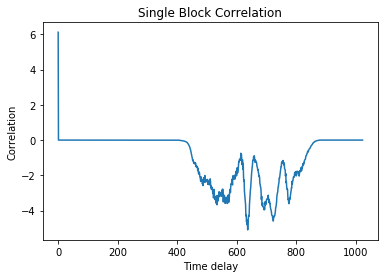

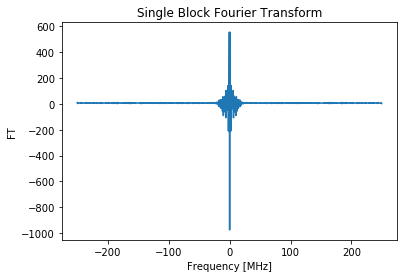

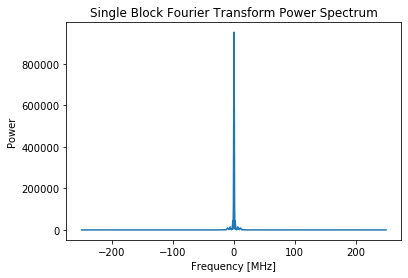

In [8]:
# plot one block of data (waveform)
plt.figure()
plt.plot(corr)
plt.title('Single Block Correlation')
plt.xlabel('Time delay')
plt.ylabel('Correlation')
plt.show()

f = np.fft.fftshift(np.fft.fftfreq(1024, 1/freq))
Fx = np.fft.fftshift(np.fft.fft(corr))
pwr = np.abs(Fx)**2

# plot one block of data (FT)
plt.figure()
plt.plot(f/10**6, Fx)
plt.title('Single Block Fourier Transform')
plt.xlabel('Frequency [MHz]')
plt.ylabel('FT')
plt.show()

# plot one block of data (power)
plt.figure()
plt.plot(f/10**6, pwr)
plt.title('Single Block Fourier Transform Power Spectrum')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power')
plt.show()

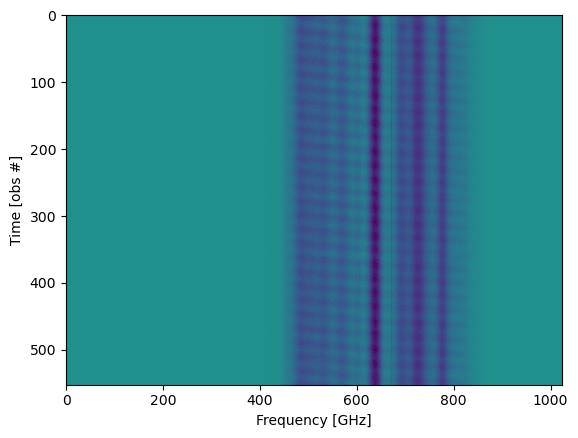

In [13]:
# plot in 2d where x and y are frequency and time and z is power
# should be able to see slopes
    
all_cor = []
for i in np.arange(len(data)):
    data_block = data[i]
    data_block_corr = data_block['corr01'].real
    all_cor += [data_block_corr]
    
# %matplotlib notebook
plt.figure()
plt.imshow(all_cor, aspect='auto', interpolation='nearest')
plt.ylabel('Time [obs #]')
plt.xlabel('Frequency [GHz]')
plt.show()

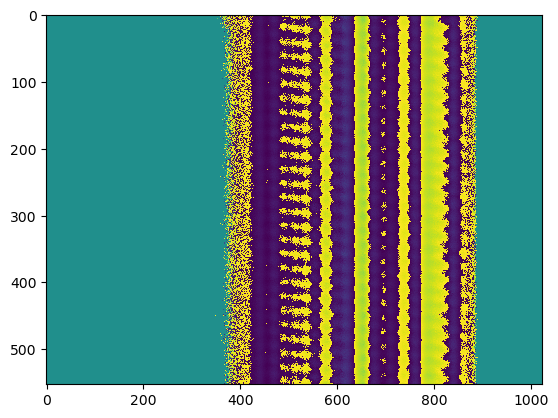

In [11]:
# plot in 2d where x and y are frequency and time and z is power: 
# np.angles shows the angle between the real and imaginary components (phase)
# should be able to see the fringes moving across - slopes
    
all_cor = []
for i in np.arange(len(data)):
    data_block = data[i]
    data_block_corr = data_block['corr01']
    all_cor += [data_block_corr]
    
# %matplotlib notebook
plt.figure()
plt.imshow(np.angle(all_cor), aspect='auto', interpolation='nearest')
plt.show()

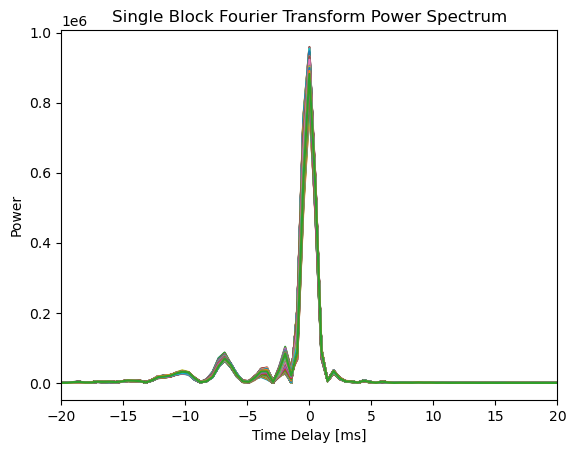

In [9]:
# %matplotlib notebook
for i in range(len(data)):
    data_block = data[i]
    corr = data_block['corr01']
    data_time = data_block['time']
    time = np.arange(len(corr)) * freq_to_period(freq/10**3) # in microseconds

    f = np.fft.fftshift(np.fft.fftfreq(1024, 1/freq))
    Fx = np.fft.fftshift(np.fft.fft(corr))
    pwr = np.abs(Fx)**2

    # plot one block of data (power)
    plt.plot(f/10**6, pwr)

plt.title('Single Block Fourier Transform Power Spectrum')
plt.xlabel('Time Delay [ms]')
plt.ylabel('Power')
plt.xlim(-20, 20)
plt.show()

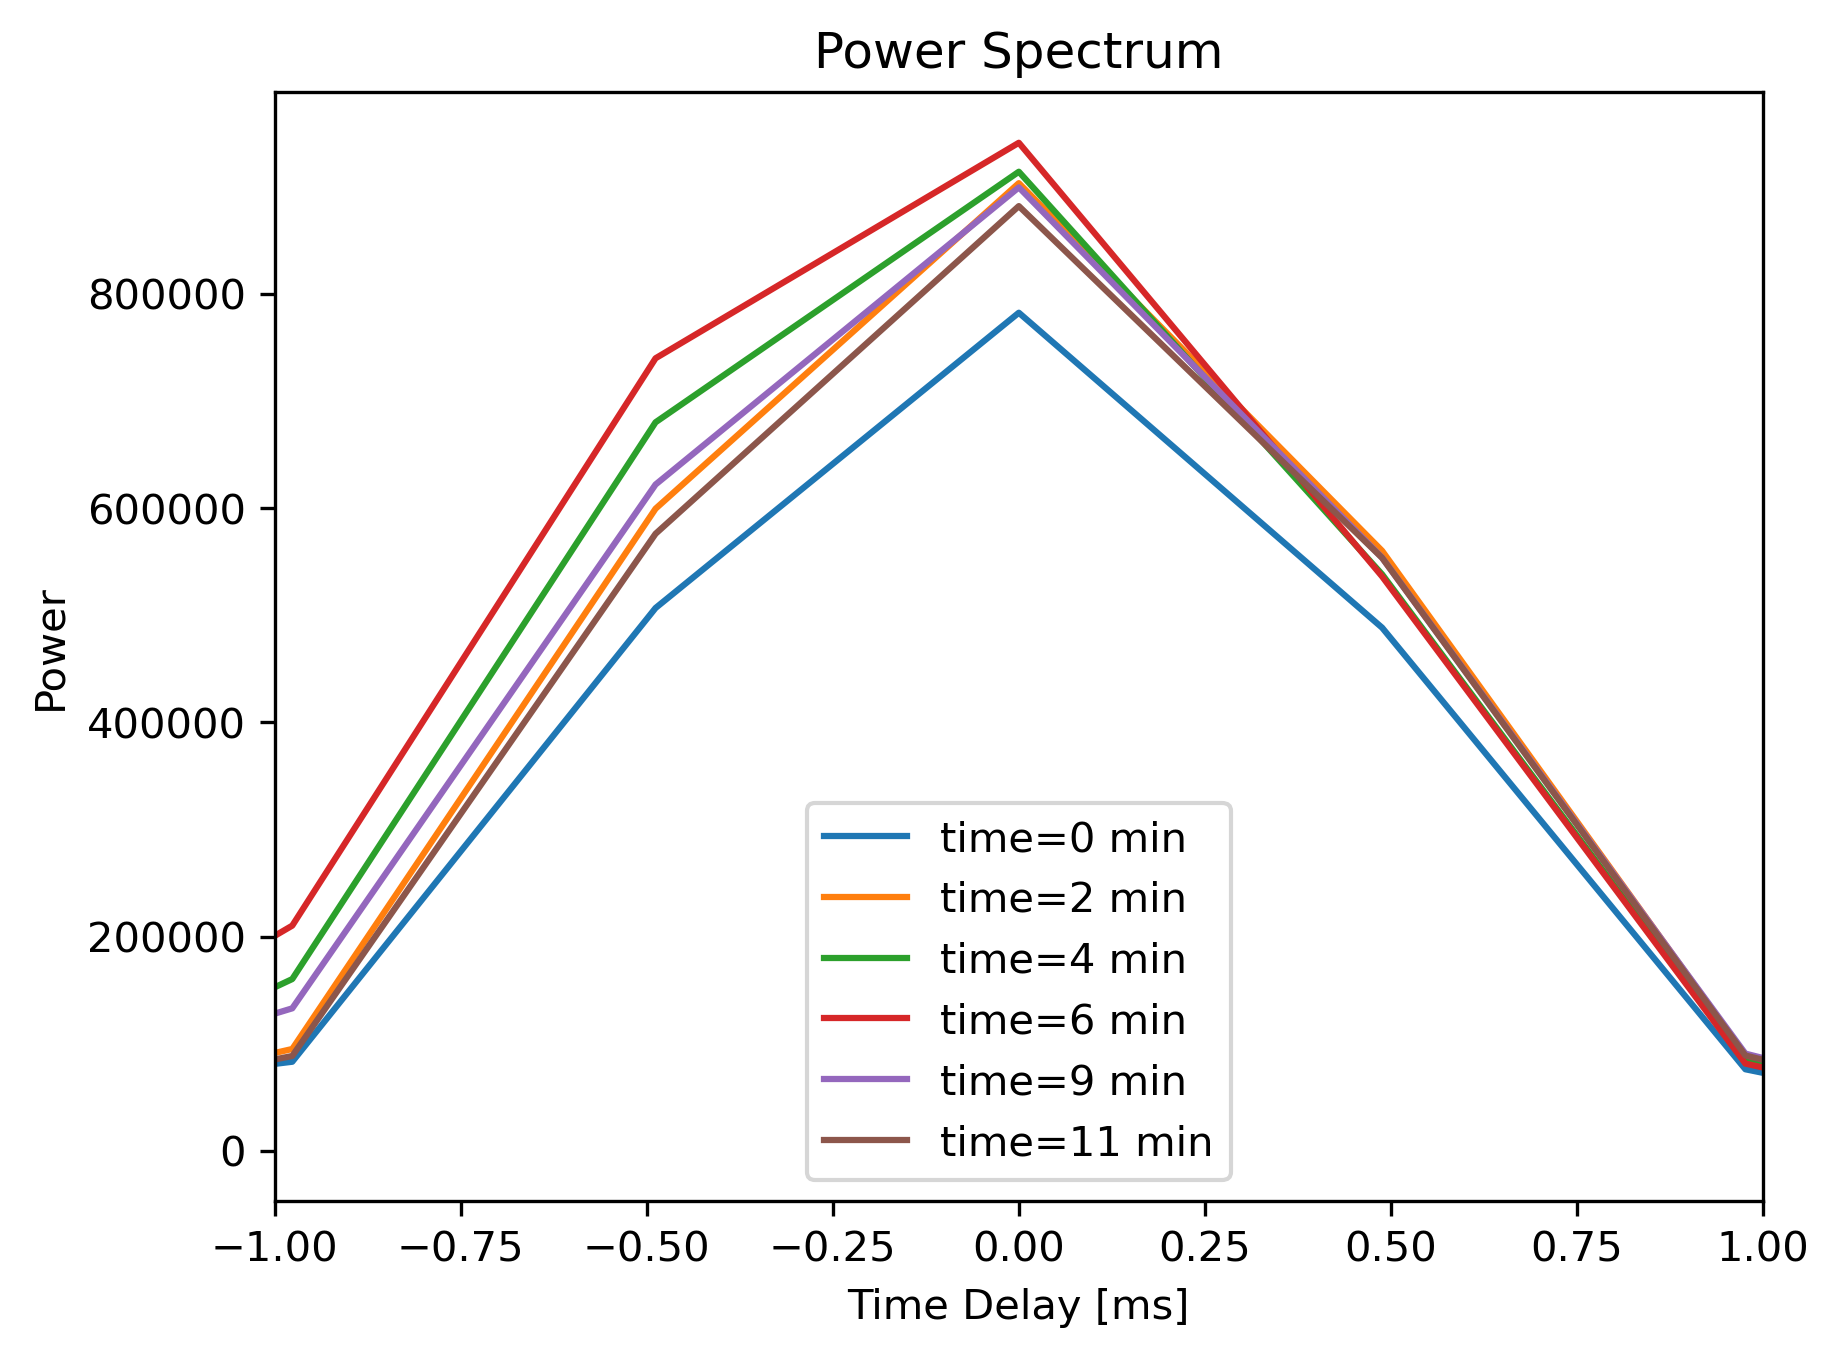

In [14]:
data_block_0 = data[0]
data_time_0 = data_block_0['time']

plt.figure(dpi=300)

t=0
for i in np.linspace(0, len(data)-1, 6).astype(int):
    data_block = data[i]
    corr = data_block['corr01']
    data_time = data_block['time']
    time = np.arange(len(corr)) * freq_to_period(freq/10**3) # in microseconds

    f = np.fft.fftshift(np.fft.fftfreq(1024, 1/freq))
    Fx = np.fft.fftshift(np.fft.fft(corr))
    pwr = np.abs(Fx)**2

    # plot one block of data (power)
    time_elapsed = int((data_time-data_time_0)/60)
    plt.plot(f/10**6, pwr, label=f'time={time_elapsed} min')
    t+=1

plt.legend()
plt.title('Power Spectrum')
plt.xlabel('Time Delay [ms]')
plt.ylabel('Power')
plt.xlim(-1, 1)
plt.show()

In [25]:
# plot one channel of frequency to get power vs time, should be bessel function 

In [ ]:
# plot time delay as a function of time